In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
import numpy as np
warnings.filterwarnings('ignore')
from datetime import timedelta

In [2]:
import flow_loop_preprocess_XW as process

In [25]:
path="../../data/Rockwell_Flow_Loop_Data/Flow_Loop_Data_072122.csv"
data=pd.read_csv(path)
data=process.table_formattting(data)

In [26]:
for col in data:
    if data[col].dtype == 'O':
        data[col] = pd.to_datetime(data[col])

i = 0
while i <= (data.shape[1] - 2):
    sub_df = process.pull_feature(i, i+1, data)
    sub_df = sub_df.resample('10S').mean()
    if i == 0:
        df = sub_df
    else:
        df = df.join(sub_df, how='outer')
    i += 2
data = df.loc[:, df.columns.str.contains('Raw')]

data.head(5)
data.tail(5)

,Loop 1 Flow Raw Value,Loop 2 Flow Raw Value,Tank 1 Level Raw Value,Tank 2 Level Raw Value,Pump 1 Inlet Pressure Raw Value,Pump 1 Outlet Pressure Raw Value,Pump 2 Inlet Pressure Raw Value,Pump 2 Outlet Pressure Raw Value,Pump 1 Speed Feedback Raw Value,Pump 2 Speed Feedback Raw Value
2022-07-21 19:59:20,NaN,3972.00,11984.125000,NaN,4431.00,4548.500000,4437.500000,4169.5,4001.500,3998.000000
2022-07-21 19:59:30,3994.25,3971.25,11981.588235,15542.0,4429.75,4548.500000,4437.555556,4169.5,4000.500,3998.285714
2022-07-21 19:59:40,3995.60,3971.50,11981.000000,15542.2,NaN,4548.461538,4437.500000,NaN,4000.500,3998.200000
2022-07-21 19:59:50,3995.60,3971.50,11980.894737,15542.4,NaN,4548.500000,4437.500000,4169.5,4000.875,3999.400000
2022-07-21 20:00:00,NaN,NaN,11988.000000,NaN,NaN,4549.000000,4437.000000,4170.0,NaN,NaN


In [27]:
#Xifan`s plotting script:
def anomalie_detection(begin, end, event_name):
    event_begin = pd.to_datetime('2022-07-21 ' + begin)
    event_end = pd.to_datetime('2022-07-21 ' + end)
    pre_time = event_begin - timedelta(minutes=0.5)
    aft_time = event_end + timedelta(minutes=2)

    sub_df = data[pre_time : aft_time]
    fig, ax = plt.subplots(figsize=(18,8))
    ax.plot(sub_df,'o-', label=data.columns)
    ax.vlines([event_begin, event_end], 1000, 18000, colors='black', linestyles='dashed' )
    ax.set_yscale('log')
    ax.legend(fontsize=12)
    ax.yaxis.label.set_size(16)
    ax.xaxis.label.set_size(16)
    ax.set_title(f'{event_name}, begin: {begin}, end: {end}', fontsize=16)
    plt.show()

In [28]:
event_dic={
    "LCV_203": ["9:58:20","10:01"],
    "overall_instrument_air": ["9:39:30","9:50"],
    "LCV_103a": ["10:22","10:36"],
    "SV_201": ["10:51","11:27"],
    "SV_101": ["12:17:30","12:19:50"],
    "LCV_103b": ["12:33:30","12:35:20"],
    "LCV_202": ["13:23:40","13:25"],
    "HV_101": ["14:40:30","14:46"],
    "HV_100": ["14:48","14:48"],
}

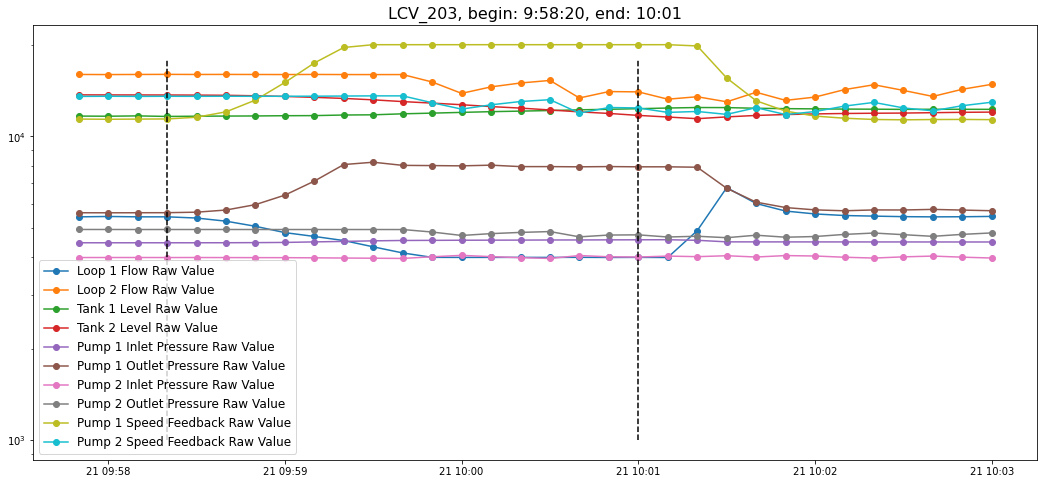

In [29]:
anomalie_detection(event_dic['LCV_203'][0], event_dic['LCV_203'][1], 'LCV_203')

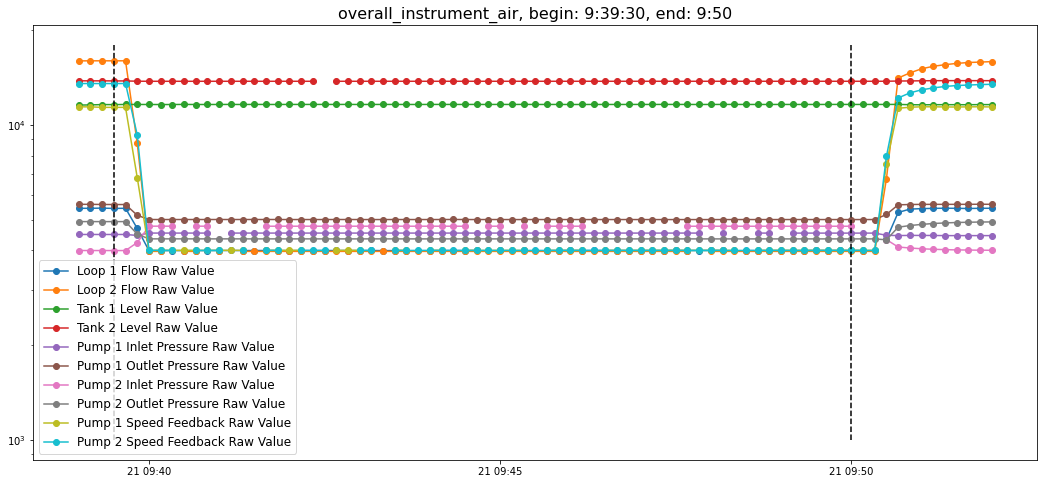

In [30]:
anomalie_detection(event_dic['overall_instrument_air'][0], event_dic['overall_instrument_air'][1], 'overall_instrument_air')

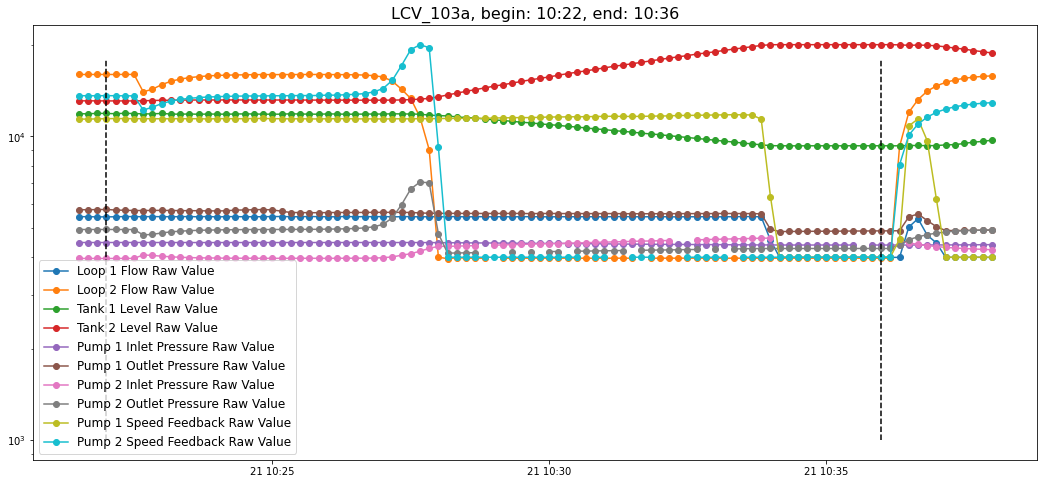

In [31]:
anomalie_detection(event_dic['LCV_103a'][0], event_dic['LCV_103a'][1], 'LCV_103a')

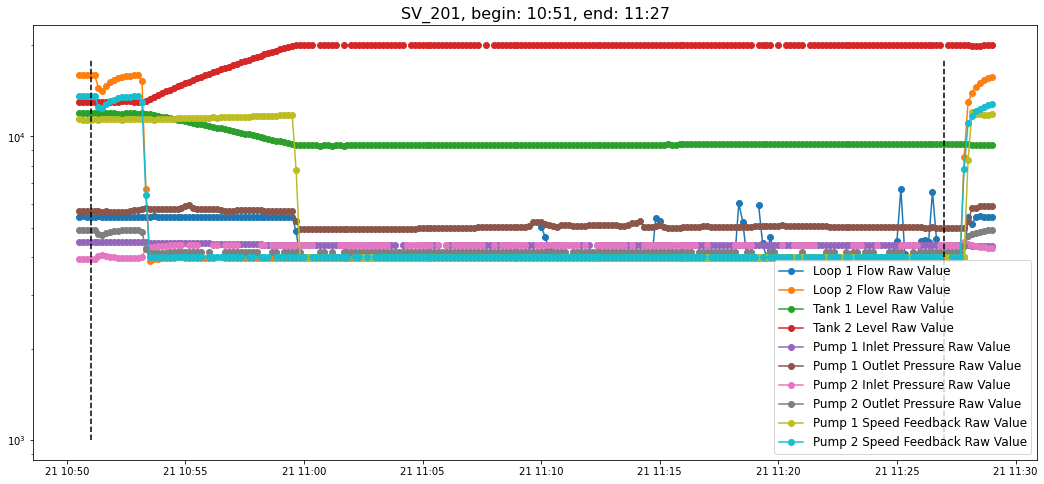

In [32]:
anomalie_detection(event_dic['SV_201'][0], event_dic['SV_201'][1], 'SV_201')

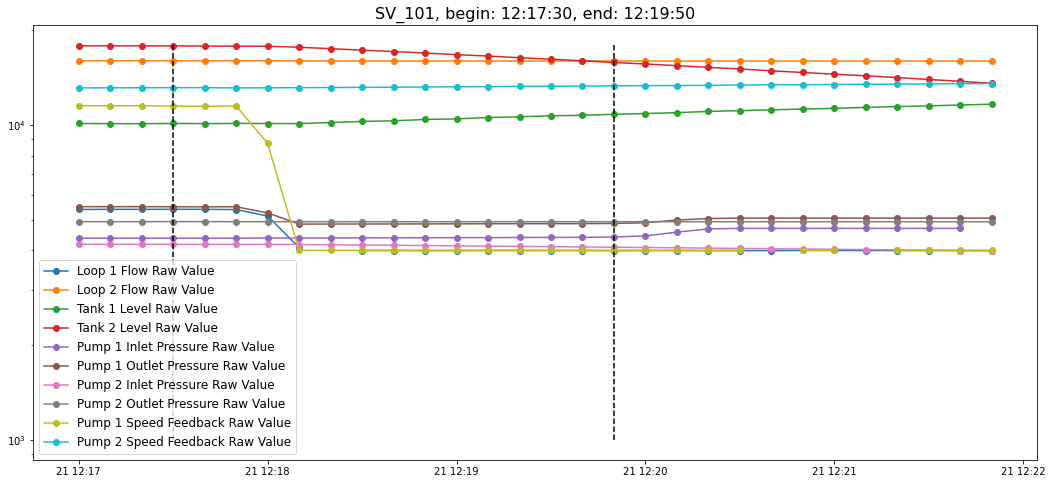

In [33]:
anomalie_detection(event_dic['SV_101'][0], event_dic['SV_101'][1], 'SV_101')

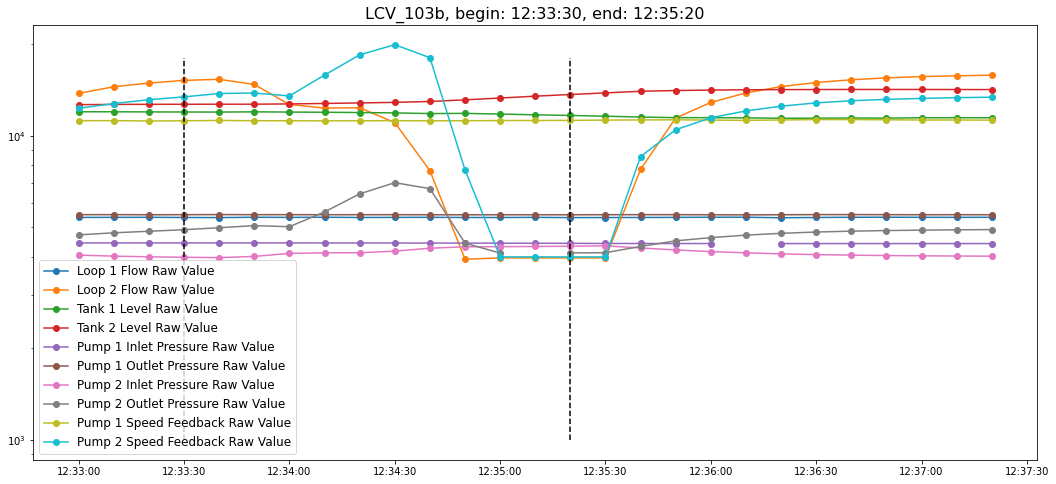

In [34]:
anomalie_detection(event_dic['LCV_103b'][0], event_dic['LCV_103b'][1], 'LCV_103b')

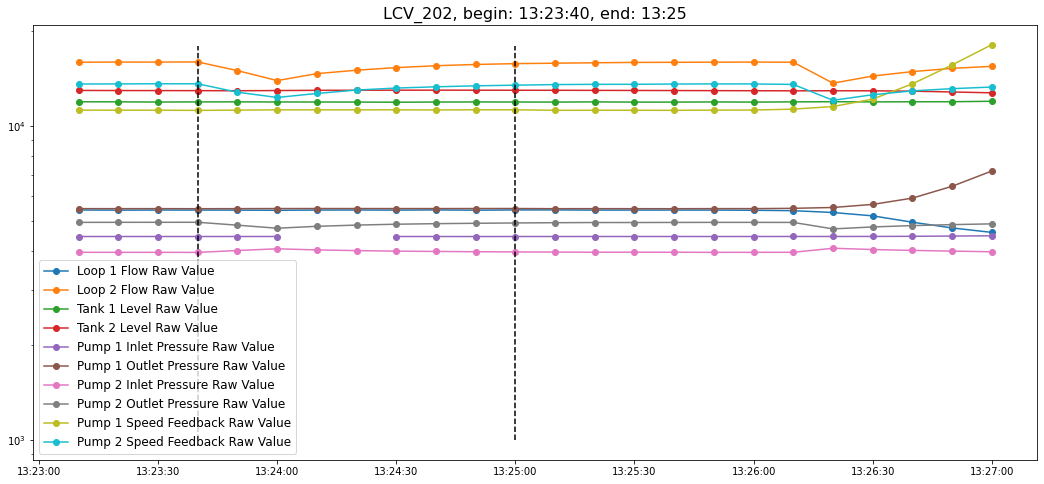

In [35]:
anomalie_detection(event_dic['LCV_202'][0], event_dic['LCV_202'][1], 'LCV_202')

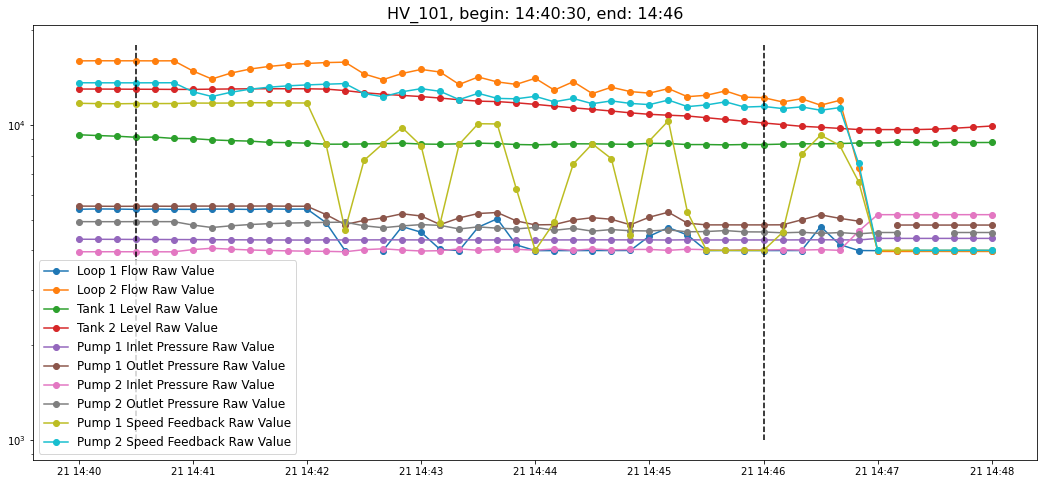

In [36]:
anomalie_detection(event_dic['HV_101'][0], event_dic['HV_101'][1], 'HV_101')

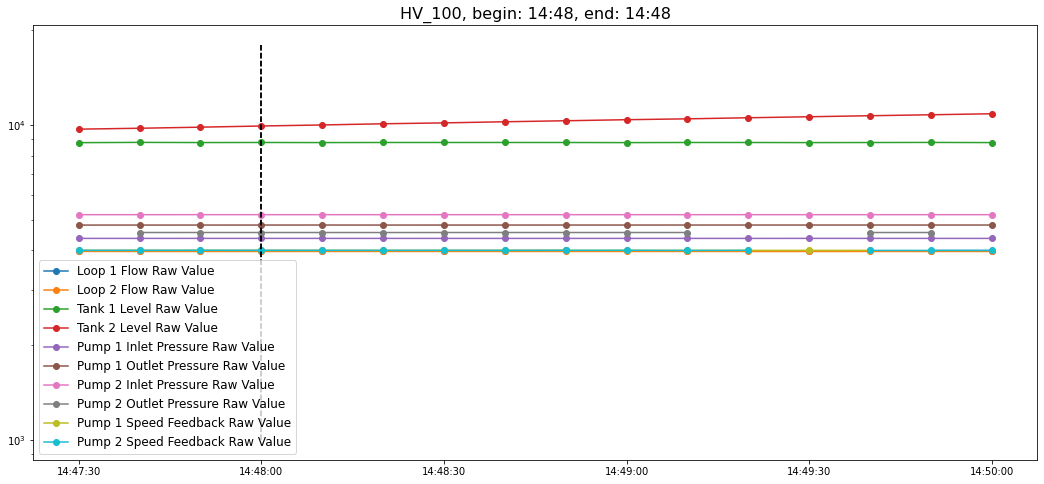

In [37]:
anomalie_detection(event_dic['HV_100'][0], event_dic['HV_100'][1], 'HV_100')

In [40]:
path2="../../data/Rockwell_Flow_Loop_Data/Flow_Loop_Data_072222.csv"
data2=pd.read_csv(path2)
data2=process.table_formattting(data2)

for col in data2:
    if data2[col].dtype == 'O':
        data2[col] = pd.to_datetime(data2[col])

i = 0
while i <= (data2.shape[1] - 2):
    sub_df2 = process.pull_feature(i, i+1, data2)
    sub_df2 = sub_df2.resample('10S').mean()
    if i == 0:
        df2 = sub_df2
    else:
        df2 = df2.join(sub_df2, how='outer')
    i += 2
data2 = df2.loc[:, df2.columns.str.contains('Raw')]

data2.head(5)

,Loop 1 Flow Raw Value,Loop 2 Flow Raw Value,Tank 1 Level Raw Value,Tank 2 Level Raw Value,Pump 1 Inlet Pressure Raw Value,Pump 1 Outlet Pressure Raw Value,Pump 2 Inlet Pressure Raw Value,Pump 2 Outlet Pressure Raw Value,Pump 1 Speed Feedback Raw Value,Pump 2 Speed Feedback Raw Value
2022-07-22 08:00:00,3996.666667,3971.0,11978.928571,NaN,4425.285714,4972.363636,NaN,4169.0,NaN,3999.000000
2022-07-22 08:00:10,3995.250000,3971.5,11982.882353,15541.333333,4425.500000,4971.900000,NaN,4169.5,4001.250,3998.833333
2022-07-22 08:00:20,3994.200000,3972.5,11979.375000,15541.000000,4425.625000,4971.777778,NaN,4169.5,4001.000,3998.500000
2022-07-22 08:00:30,3996.714286,3970.5,11983.555556,15541.500000,4425.500000,4972.428571,NaN,4169.5,4000.500,3998.000000
2022-07-22 08:00:40,3997.500000,3970.5,11984.000000,15541.500000,4425.666667,4972.200000,4434.0,4168.5,4000.625,3997.000000


In [41]:
data2.tail(5)

,Loop 1 Flow Raw Value,Loop 2 Flow Raw Value,Tank 1 Level Raw Value,Tank 2 Level Raw Value,Pump 1 Inlet Pressure Raw Value,Pump 1 Outlet Pressure Raw Value,Pump 2 Inlet Pressure Raw Value,Pump 2 Outlet Pressure Raw Value,Pump 1 Speed Feedback Raw Value,Pump 2 Speed Feedback Raw Value
2022-07-22 19:59:20,3996.500000,3969.500000,11871.111111,13704.428571,4423.500000,5098.375000,4349.461538,NaN,4001.000,3998.555556
2022-07-22 19:59:30,3999.500000,3969.454545,11869.473684,13704.400000,4422.857143,5098.818182,4349.500000,NaN,4000.500,3998.500000
2022-07-22 19:59:40,3998.000000,3969.545455,11870.842105,13704.666667,4423.500000,5098.857143,4349.571429,4126.5,4000.125,3998.000000
2022-07-22 19:59:50,3996.333333,3969.428571,11870.263158,13704.500000,4423.500000,5098.444444,4349.428571,NaN,4000.500,3999.000000
2022-07-22 20:00:00,NaN,3969.000000,11881.000000,13704.000000,NaN,NaN,NaN,NaN,NaN,3999.000000


In [42]:
def anomalie_detection2(begin, end, event_name):
    event_begin = pd.to_datetime('2022-07-22 ' + begin)
    event_end = pd.to_datetime('2022-07-22 ' + end)
    pre_time = event_begin - timedelta(minutes=0.5)
    aft_time = event_end + timedelta(minutes=2)

    sub_df2 = data2[pre_time : aft_time]
    fig, ax = plt.subplots(figsize=(18,8))
    ax.plot(sub_df2,'o-', label=data2.columns)
    ax.vlines([event_begin, event_end], 1000, 18000, colors='black', linestyles='dashed' )
    ax.set_yscale('log')
    ax.legend(fontsize=12)
    ax.yaxis.label.set_size(16)
    ax.xaxis.label.set_size(16)
    ax.set_title(f'{event_name}, begin: {begin}, end: {end}', fontsize=16)
    plt.show()

In [109]:
event_dic2={
     "LCV_203":["14:46:20","14:49"],
     "LCV_103":["15:16","15:18"],
     "CCV_103":["15:19","15:23"],
     "SV_201":["15:34","15:37"],
     "SV_101":["15:56:30","15:58"],
     "power": ["16:12","16:16"],
     "overall_instrument_air":["16:30:30","16:34:30"],
     "power": ["16:37","16:38"],
     "HV_201a": ["16:49","16:49"],
     "HV_201b":["17:20","17:23"],
    "Pumps":["17:26","17:27"],
} 

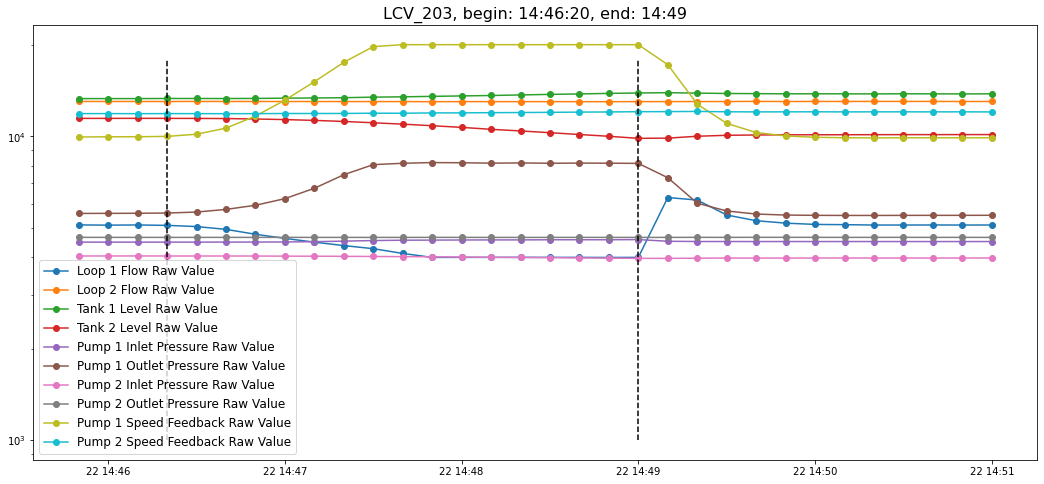

In [50]:
anomalie_detection2(event_dic2['LCV_203'][0], event_dic2['LCV_203'][1], 'LCV_203')

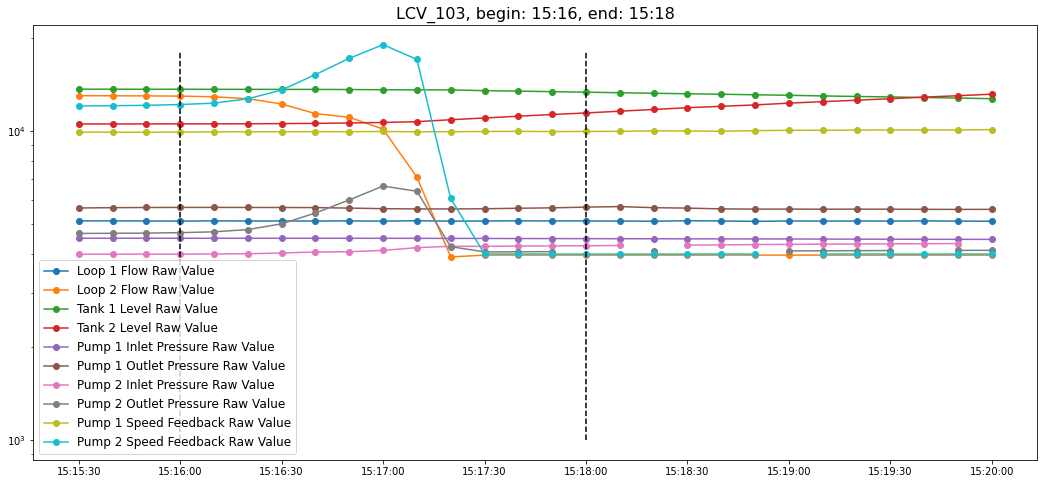

In [60]:
anomalie_detection2(event_dic2['LCV_103'][0], event_dic2['LCV_103'][1], 'LCV_103')

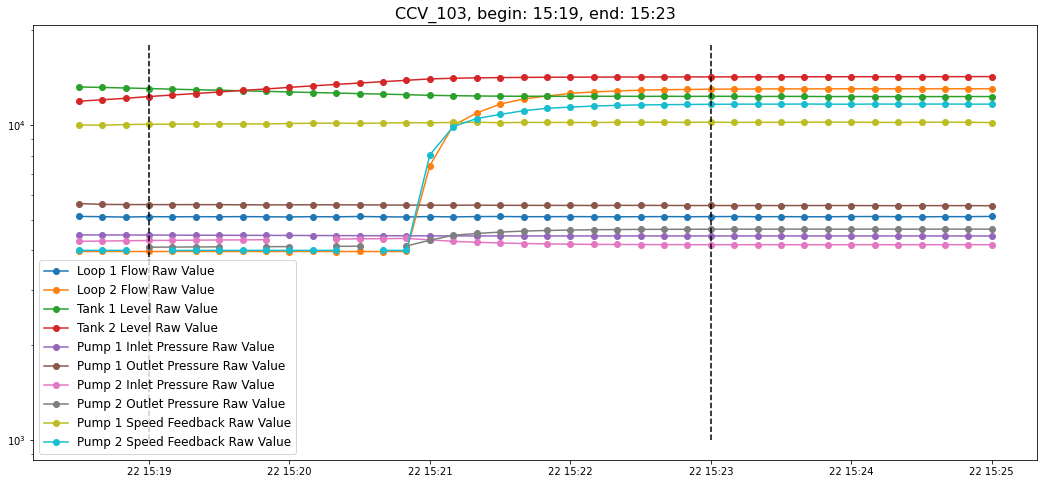

In [63]:
anomalie_detection2(event_dic2['CCV_103'][0], event_dic2['CCV_103'][1], 'CCV_103')

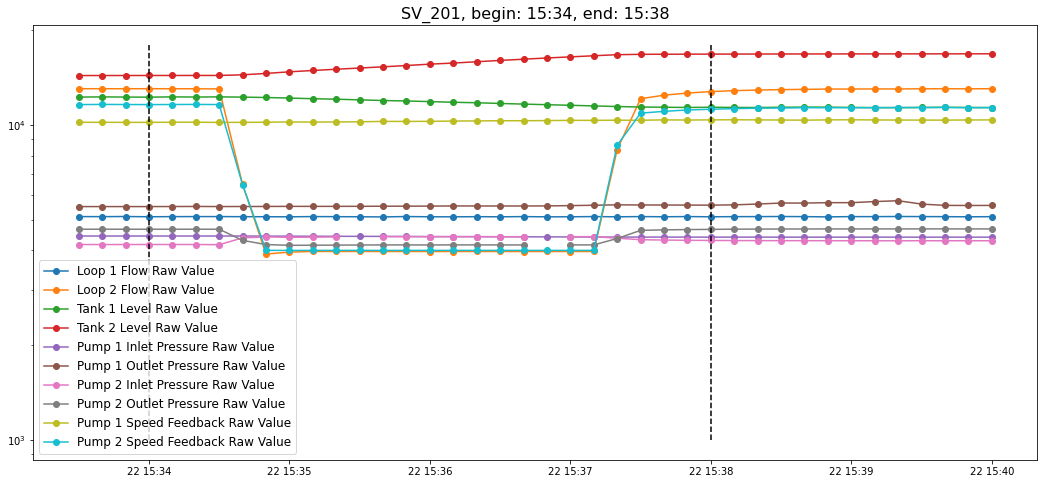

In [68]:
anomalie_detection2(event_dic2['SV_201'][0], event_dic2['SV_201'][1], 'SV_201')

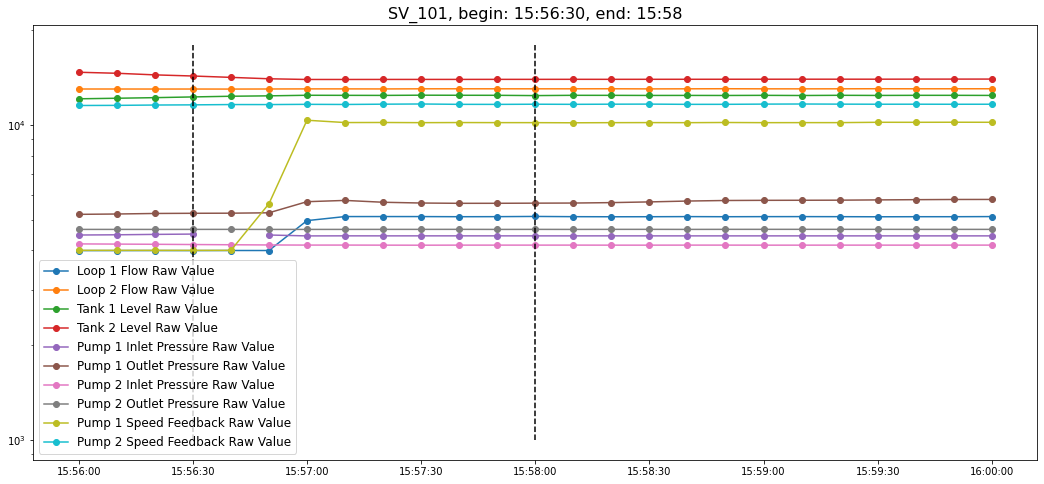

In [74]:
anomalie_detection2(event_dic2['SV_101'][0], event_dic2['SV_101'][1], 'SV_101')

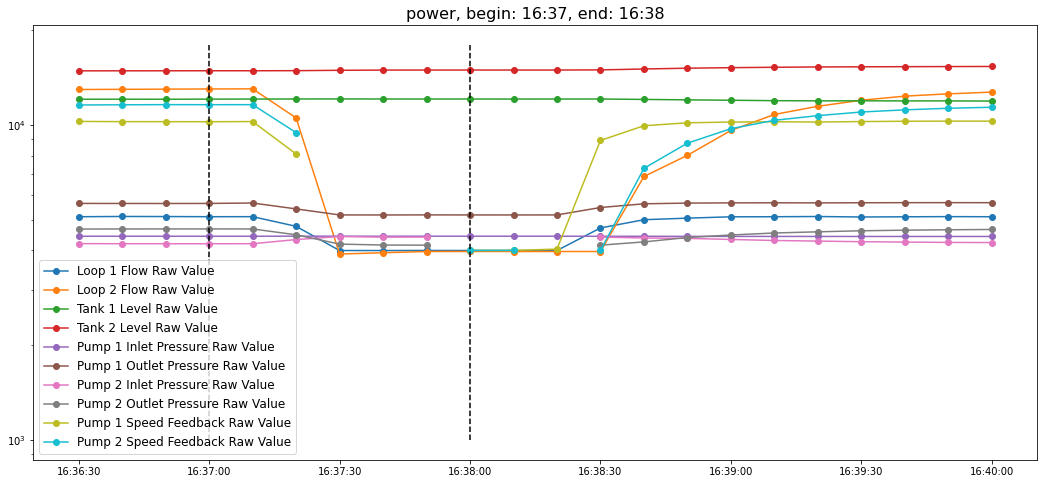

In [75]:
anomalie_detection2(event_dic2['power'][0], event_dic2['power'][1], 'power')

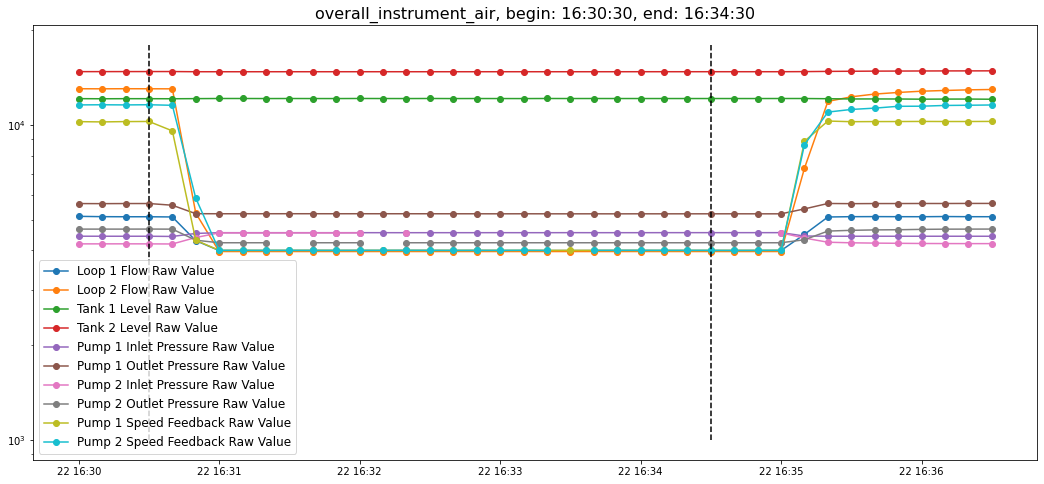

In [82]:
anomalie_detection2(event_dic2['overall_instrument_air'][0], event_dic2['overall_instrument_air'][1], 'overall_instrument_air')

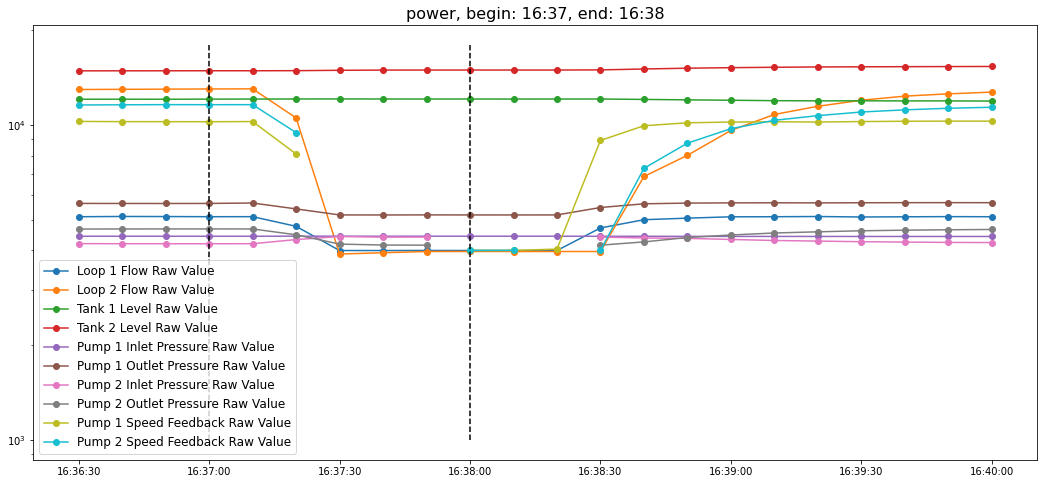

In [84]:
anomalie_detection2(event_dic2['power'][0], event_dic2['power'][1], 'power')

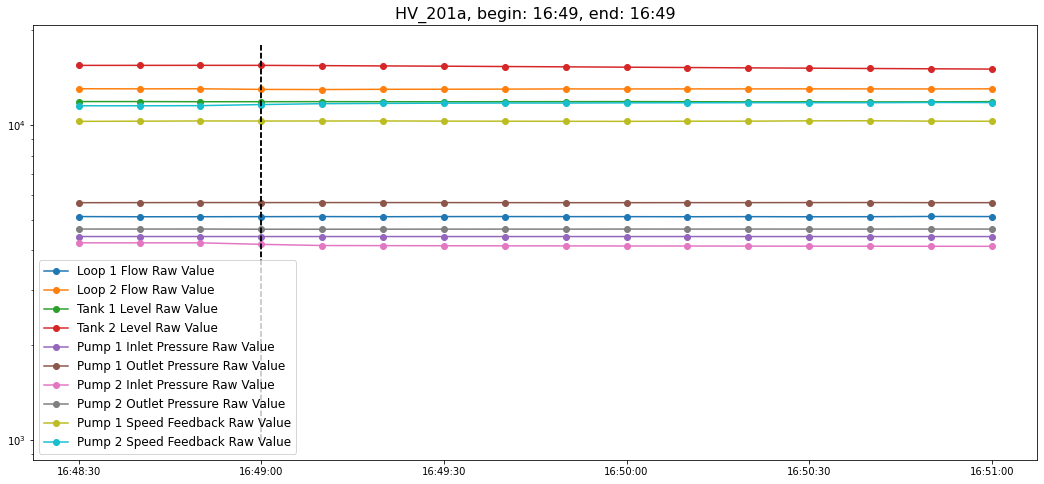

In [86]:
anomalie_detection2(event_dic2['HV_201a'][0], event_dic2['HV_201a'][1], 'HV_201a')

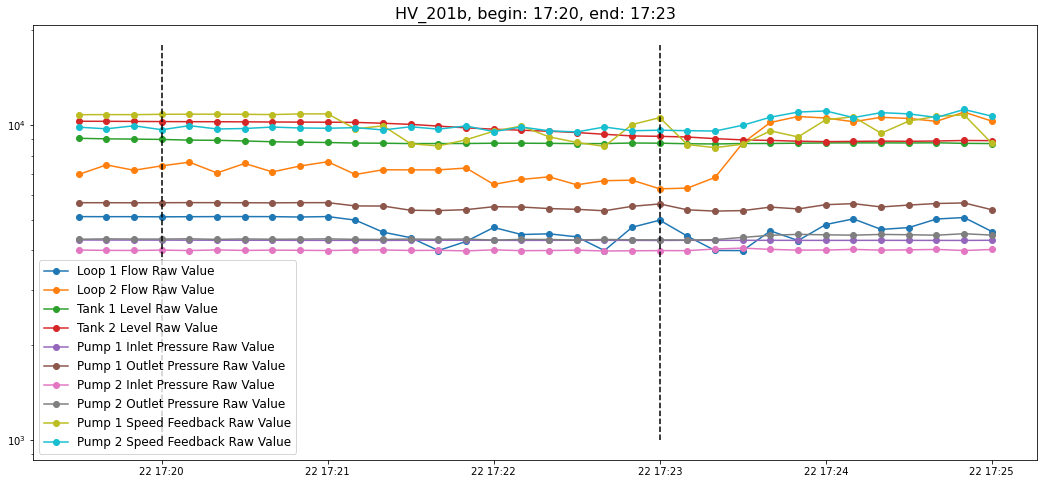

In [99]:
anomalie_detection2(event_dic2['HV_201b'][0], event_dic2['HV_201b'][1], 'HV_201b')

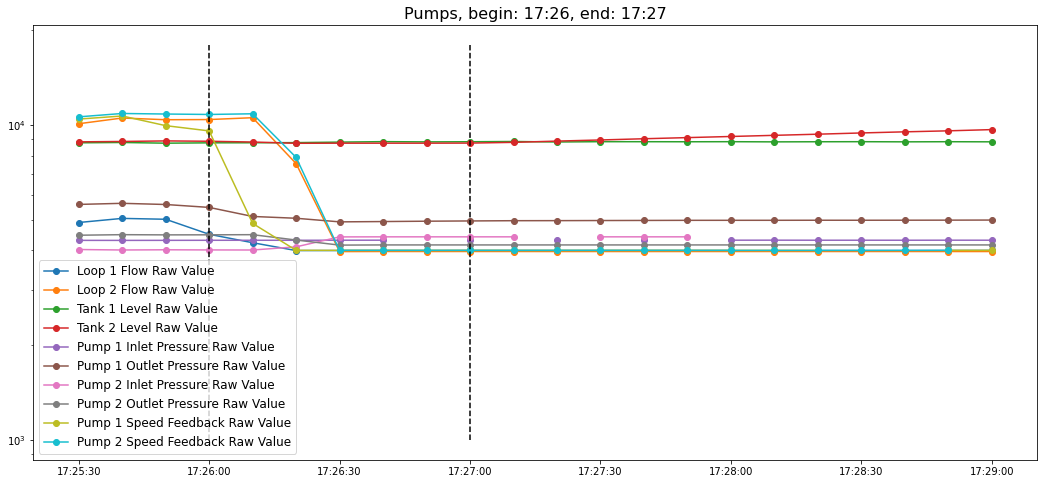

In [110]:
anomalie_detection2(event_dic2['Pumps'][0], event_dic2['Pumps'][1], 'Pumps')

In [112]:
path3="../../data/Rockwell_Flow_Loop_Data/Flow_Loop_Data_072522.csv"
data3=pd.read_csv(path3)
data3=process.table_formattting(data3)

for col in data3:
    if data3[col].dtype == 'O':
        data3[col] = pd.to_datetime(data3[col])

i = 0
while i <= (data3.shape[1] - 2):
    sub_df3 = process.pull_feature(i, i+1, data3)
    sub_df3 = sub_df3.resample('10S').mean()
    if i == 0:
        df3 = sub_df3
    else:
        df3 = df3.join(sub_df3, how='outer')
    i += 2
data3 = df3.loc[:, df3.columns.str.contains('Raw')]

data3.head(5)

,Loop 1 Flow Raw Value,Loop 2 Flow Raw Value,Tank 1 Level Raw Value,Tank 2 Level Raw Value,Pump 1 Inlet Pressure Raw Value,Pump 1 Outlet Pressure Raw Value,Pump 2 Inlet Pressure Raw Value,Pump 2 Outlet Pressure Raw Value,Pump 1 Speed Feedback Raw Value,Pump 2 Speed Feedback Raw Value
2022-07-25 08:00:00,3996.000000,3971.4,11870.000000,13695.5,4420.0,5162.333333,4354.0,4126.500000,4000.400000,NaN
2022-07-25 08:00:10,3995.666667,3971.5,11871.210526,13695.0,4420.0,5162.000000,NaN,4126.500000,4000.200000,3999.0
2022-07-25 08:00:20,3995.000000,3970.5,11872.125000,NaN,NaN,5162.600000,NaN,4126.428571,4000.600000,3998.0
2022-07-25 08:00:30,3996.500000,3971.0,11871.187500,13694.5,4420.0,5162.600000,4353.5,4126.500000,4000.600000,3998.5
2022-07-25 08:00:40,3997.250000,3971.5,11873.470588,NaN,4420.5,5162.125000,4353.5,4126.571429,4000.428571,NaN


In [115]:
def anomalie_detection3(begin, end, event_name):
    event_begin = pd.to_datetime('2022-07-25 ' + begin)
    event_end = pd.to_datetime('2022-07-25 ' + end)
    pre_time = event_begin - timedelta(minutes=0.5)
    aft_time = event_end + timedelta(minutes=2)

    sub_df3 = data3[pre_time : aft_time]
    fig, ax = plt.subplots(figsize=(18,8))
    ax.plot(sub_df3,'o-', label=data3.columns)
    ax.vlines([event_begin, event_end], 1000, 18000, colors='black', linestyles='dashed' )
    ax.set_yscale('log')
    ax.legend(fontsize=12)
    ax.yaxis.label.set_size(16)
    ax.xaxis.label.set_size(16)
    ax.set_title(f'{event_name}, begin: {begin}, end: {end}', fontsize=16)
    plt.show()

In [176]:
event_dic3={"LCV_203":["11:51","11:52:30"],
            "Pumpsa":["12:17","12:18:30"],
            "Pumpsb":["13:05","13:15"],
            "LCV_103a":["13:42:30","13:44:30"],
            "SV_202_B":["13:59","14:03"],
            "SV_101a":["14:34","14:36"],
            "LCV_203":["16:03","16:05"],
            "LCV_103b":["16:44","16:46"],
            "SV_201":["16:58","16:59"],
            "SV_101b":["17:09","17:10"],
           }

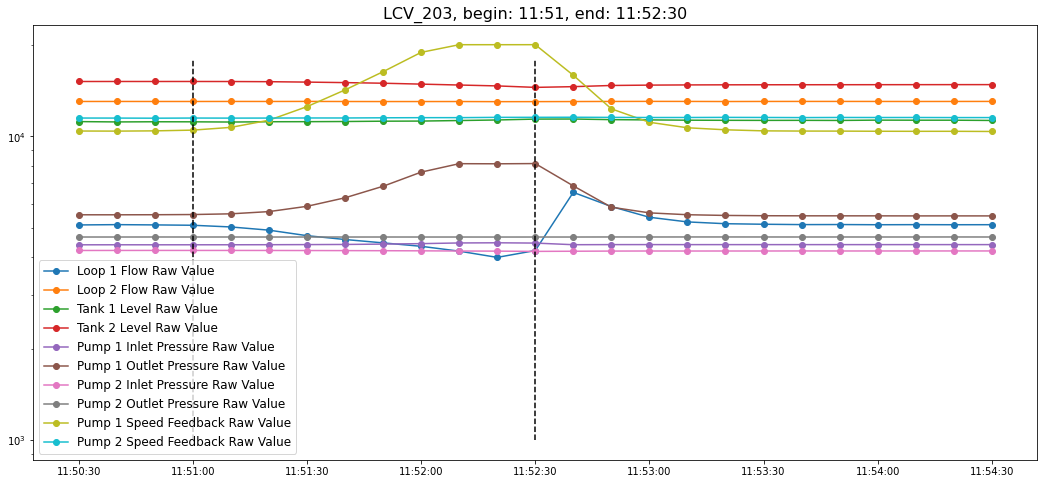

In [119]:
anomalie_detection3(event_dic3['LCV_203'][0], event_dic3['LCV_203'][1], 'LCV_203')

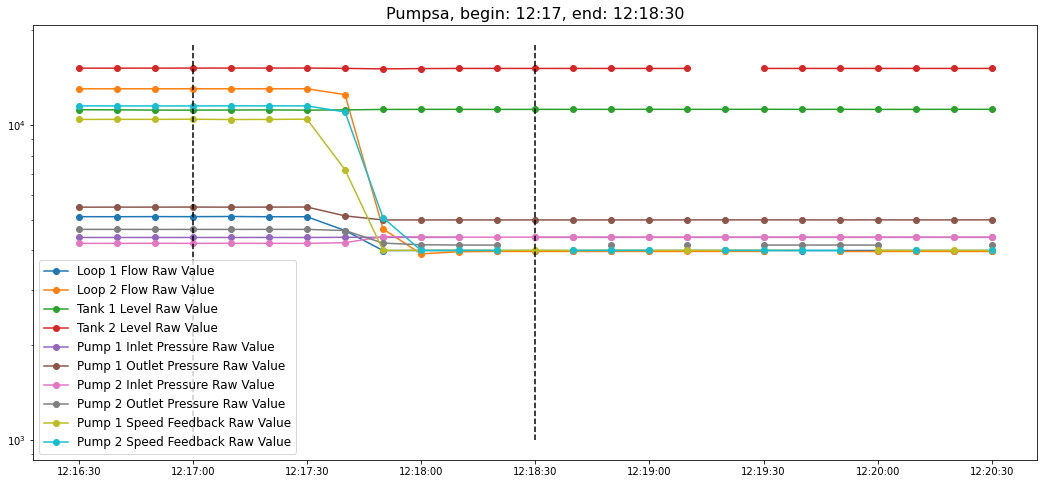

In [126]:
anomalie_detection3(event_dic3['Pumpsa'][0], event_dic3['Pumpsa'][1], 'Pumpsa')

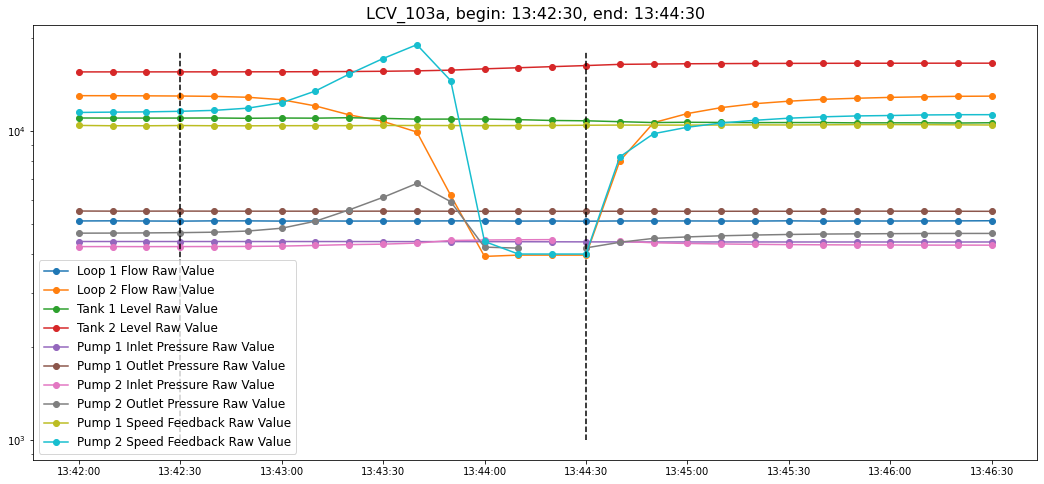

In [147]:
anomalie_detection3(event_dic3['LCV_103a'][0], event_dic3['LCV_103a'][1], 'LCV_103a')

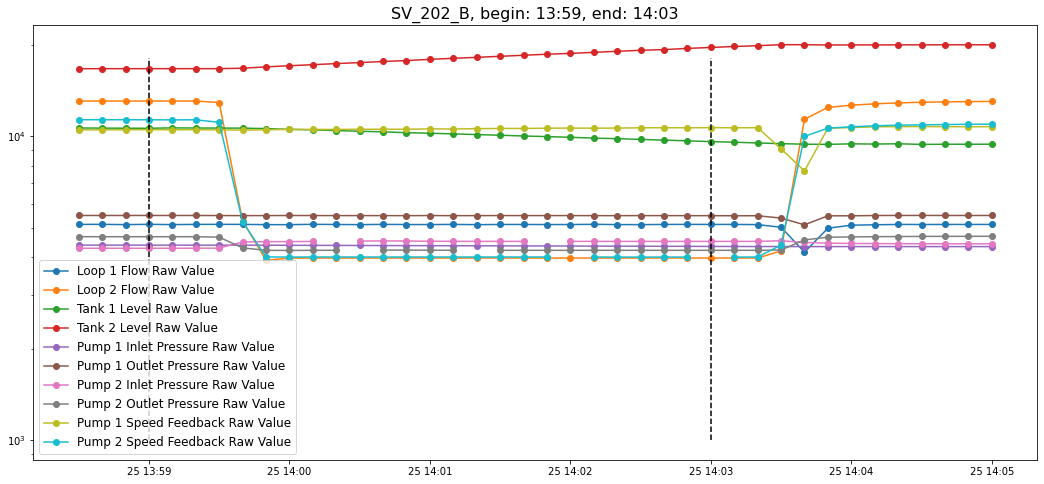

In [153]:
anomalie_detection3(event_dic3['SV_202_B'][0], event_dic3['SV_202_B'][1], 'SV_202_B')

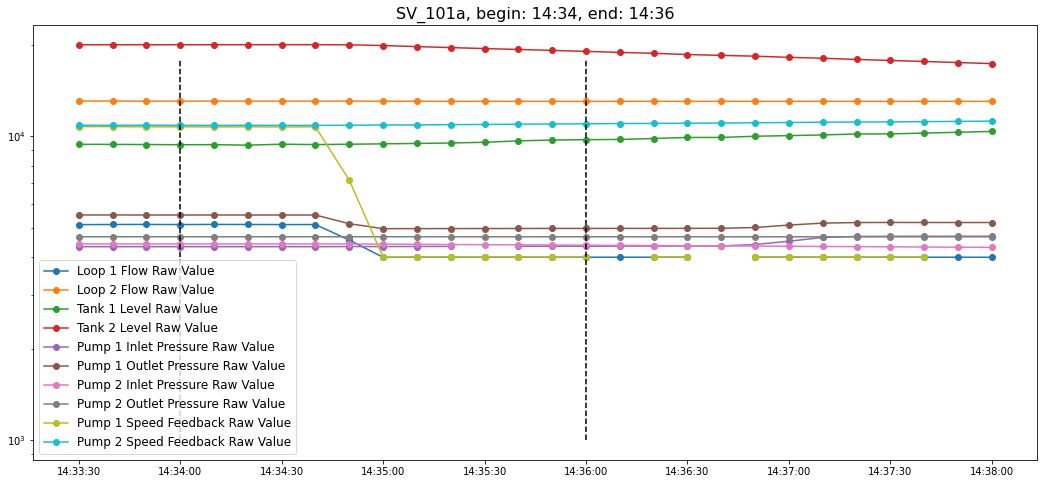

In [160]:
anomalie_detection3(event_dic3['SV_101a'][0], event_dic3['SV_101a'][1], 'SV_101a')

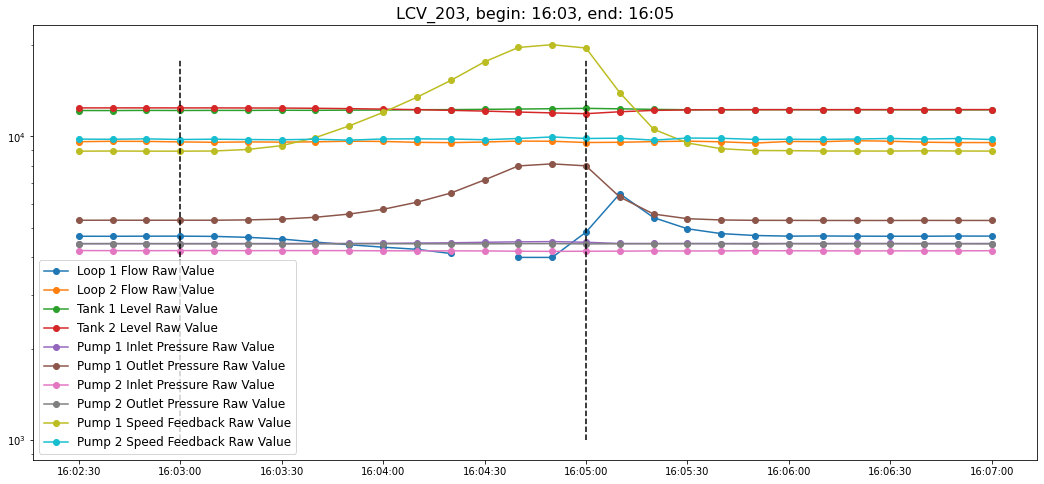

In [164]:
anomalie_detection3(event_dic3['LCV_203'][0], event_dic3['LCV_203'][1], 'LCV_203')

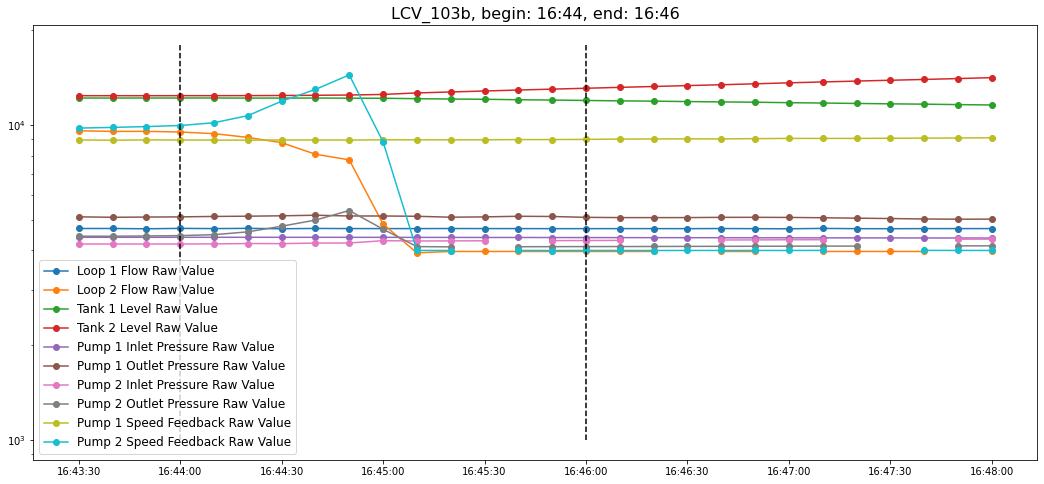

In [168]:
anomalie_detection3(event_dic3['LCV_103b'][0], event_dic3['LCV_103b'][1], 'LCV_103b')

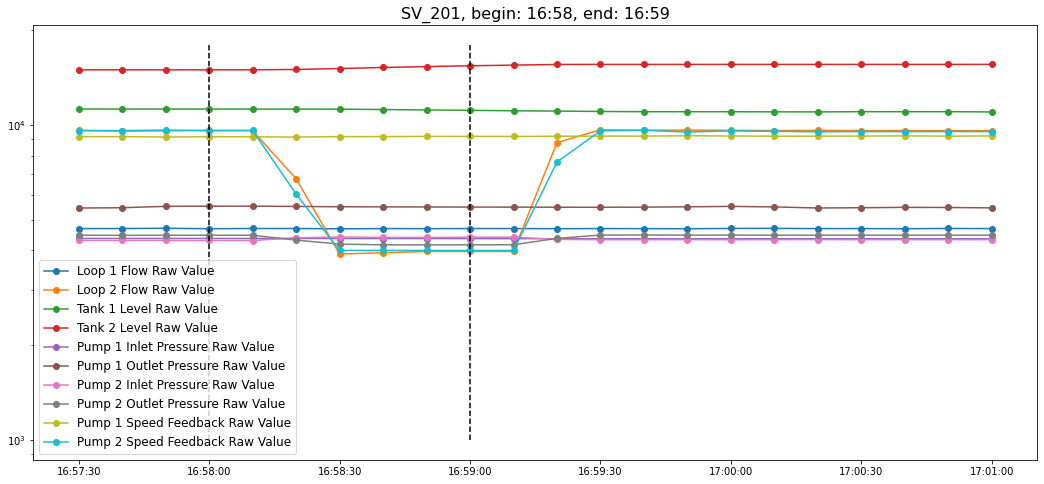

In [171]:
anomalie_detection3(event_dic3['SV_201'][0], event_dic3['SV_201'][1], 'SV_201')

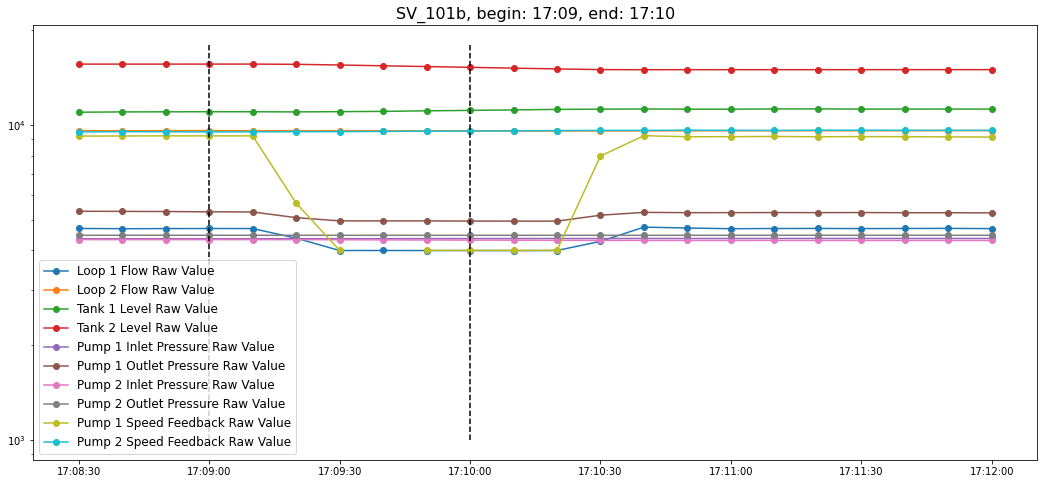

In [177]:
anomalie_detection3(event_dic3['SV_101b'][0], event_dic3['SV_101b'][1], 'SV_101b')